# Shared bike dataset

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geodistance import haversine
import time

In [73]:
df=pd.read_csv("201801-fordgobike-tripdata.csv") 

C:\Users\Liqun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Example of dataset

In [74]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_km,start_city,end_city,month,day,hour
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,2.492,San F,San F,1.0,31.0,22.0
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,0.000,San F,San F,1.0,31.0,16.0
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,2.975,East B,East B,1.0,31.0,14.0
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,No,2.050,San F,San F,1.0,31.0,14.0
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,2.441,San F,San F,1.0,31.0,19.0


In [75]:
df.columns
# Index(['Unnamed: 0', 'a', 'b', 'c'], dtype='object')

df.columns.str.match('Unnamed')
# array([ True, False, False, False])

df=df.loc[:, ~df.columns.str.match('Unnamed')]


# Distribution of OD

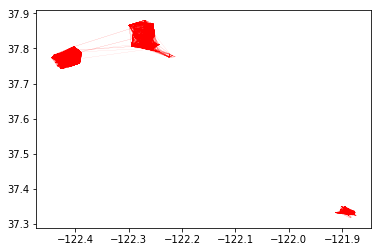

In [ ]:
plt.figure('asdf')
aa = plt.gca()
aa.plot([df.start_station_longitude, df.end_station_longitude], [df.start_station_latitude, df.end_station_latitude], color='r', linewidth=0.1, alpha=0.5)
plt.show(aa)

# Distribution of Distance(km)

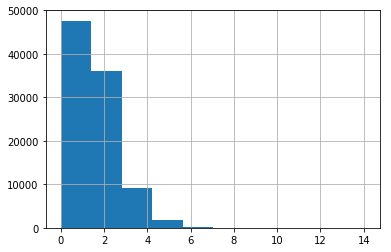

In [ ]:
df.Distance_km.hist()

# Distribution of duration(S)

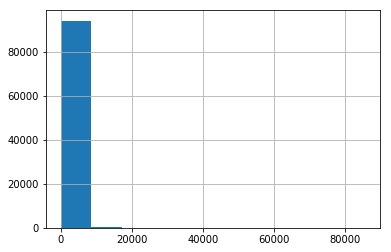

In [ ]:
df.duration_sec.hist()

In [ ]:
for i in range(len(df.start_time)):
    timeArray = time.strptime(df.start_time[i], "%Y-%m-%d %H:%M:%S.%f")
    m=timeArray[1]
    d=timeArray[2]
    h=timeArray[3]
    df.month.loc[i] = m
    df.day.loc[i] = d
    df.hour.loc[i] = h

In [ ]:
for i in range(len(df.start_city)):
    if df.start_station_latitude[i] < 37.592714:
        df.start_city.loc[i] = 'New J'
    if df.end_station_latitude[i] < 37.592714:
        df.end_city.loc[i] = 'New J'
    if df.start_station_longitude[i] < -122.35964:
        df.start_city.loc[i] = 'San F'
    if df.end_station_longitude[i] < -122.35964:
        df.end_city.loc[i] = 'San F'
    else:
        df.start_city.loc[i]='East B'
        df.end_city.loc[i]='East B'

In [ ]:
df.head()

In [ ]:
df.to_csv("201801-fordgobike-tripdata.csv", sep=',', encoding='utf-8', index=False)